In [1]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
to_run = True
if to_run:
    os.chdir('..')
    to_run = False
print(os.getcwd())

/workspaces/REBS/pm4py-dcr-feature-dcr_in_pm4py_revised/notebooks
/workspaces/REBS/pm4py-dcr-feature-dcr_in_pm4py_revised


# Group Details

**Group ID:**

**Group name:**

**Group members that contributed to the assignment (full name):**


# Part 1


Consider the following activities extracted from the Dreyers log introduced and examined in the paper The Analysis of a Real Life Declarative Process:

```python
Fill out application
Architect Review
Lawyer Review
Reject
Applicant informed
Change phase to Abort
Change Phase to Payout
First payment
Undo payment 
Change Phase to End Report
Account number changed
Approve changed account 
Execute abandon
Change phase to Abandon
```


## Task 1


Using these activities, model a simple workflow of an application process as a Petri net. It does not need to follow exactly the process as described in the paper and you may add additional details yourself, but you should ensure that your process captures at least the following rules:

1. Fill out application should always be the first event of the case. 
2. Lawyer Review and Architect Review can not occur unless Fill out application happened before.
3. Lawyer Review and Architect Review should never occur together.
4. Reject should always eventually be followed by Applicant informed and Change phase to Abort.
5. First payment should only occur once, unless Undo payment is executed afterwards, in which case it may be repeated once more.
6. If Account number changed happens, then afterwards Approve changed account needs to be executed and we can no longer execute First payment until the approval has happened.
7. Change Phase to Payout should always eventually be followed by First payment.
8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.

Create a copy of your Petrinet with one additional rule:

9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.

In [2]:
import pandas as pd
import pm4py
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Create a Petri net
net = PetriNet("petri_net_rules_1_to_8")

# Create transitions
t_fill_out_application = PetriNet.Transition("t_fill_out_application", "Fill out application")
t_architect_review = PetriNet.Transition("t_architect_review", "Architect Review")
t_lawyer_review = PetriNet.Transition("t_lawyer_review", "Lawyer Review")
t_reject = PetriNet.Transition("t_reject", "Reject")
t_applicant_informed = PetriNet.Transition("t_applicant_informed", "Applicant informed")
t_change_phase_to_abort = PetriNet.Transition("t_change_phase_to_abort", "Change phase to Abort")
t_change_phase_to_payout = PetriNet.Transition("t_change_phase_to_payout", "Change Phase to Payout")
t_first_payment = PetriNet.Transition("t_first_payment", "First payment")
t_undo_payment = PetriNet.Transition("t_undo_payment", "Undo payment")
t_change_phase_to_end_report = PetriNet.Transition("t_change_phase_to_end_report", "Change Phase to End Report")
t_account_number_changed = PetriNet.Transition("t_account_number_changed", "Account number changed")
t_approve_changed_account = PetriNet.Transition("t_approve_changed_account", "Approve changed account")
t_execute_abandon = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_change_phase_to_abandon = PetriNet.Transition("t_change_phase_to_abandon", "Change phase to Abandon")

net.transitions.add(t_fill_out_application)
net.transitions.add(t_architect_review)
net.transitions.add(t_lawyer_review)
net.transitions.add(t_reject)
net.transitions.add(t_applicant_informed)
net.transitions.add(t_change_phase_to_abort)
net.transitions.add(t_change_phase_to_payout)
net.transitions.add(t_first_payment)
net.transitions.add(t_undo_payment)
net.transitions.add(t_change_phase_to_end_report)
net.transitions.add(t_account_number_changed)
net.transitions.add(t_approve_changed_account)
net.transitions.add(t_execute_abandon)
net.transitions.add(t_change_phase_to_abandon)

# Create places
p1 = PetriNet.Place("p1")
p2 = PetriNet.Place("p2")
p3 = PetriNet.Place("p3")

net.places.add(p1)
net.places.add(p2)

# Create arcs
petri_utils.add_arc_from_to(p1, t_fill_out_application, net)
petri_utils.add_arc_from_to(t_fill_out_application, p2, net)

#Add rules 2-8 to the Petri net
# TODO


# Initial and final markings
# TODO: update as needed.
initial_marking = Marking()
initial_marking[p1] = 1

final_marking = Marking()
final_marking[p2] = 1

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

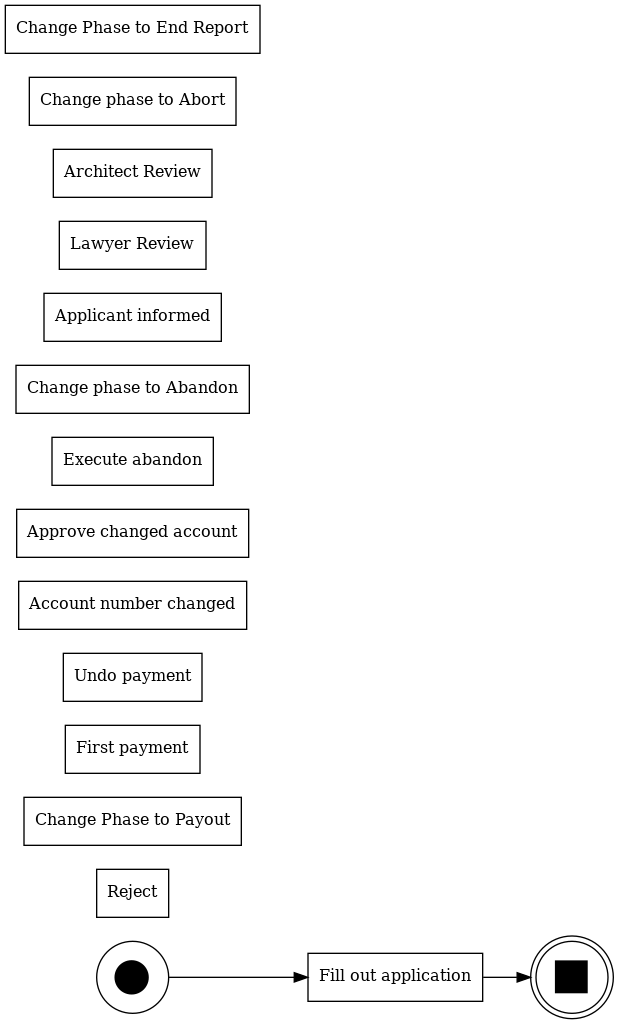

In [15]:
#Add rule 9 to the Petri net
# TODO


# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## Task 2


For each rule describe how the rule is implemented (as a short paragraph for each rule).

**Rule 1**

**Rule 2**

**Rule 3**

**Rule 4**

**Rule 5**

**Rule 6**

**Rule 7**

**Rule 8**

**Rule 9**


## Task 3

Answer the following questions and add a short (1 paragraph) argument for your answer:

**Is your Petri net live and/or quasi-live?**

**Is your Petri net bounded and/or safe?**

**Is your Petri net a WorkFlow net?**



# Part 2: Modelling Event Patterns as DCR Graphs

## Task 1

Model the rules from part 1 as individual DCR Graphs. (Yielding 9 graphs in total.)  Write a short description for each explaining the semantics. For convenience you may want to use an “other” event in some of your models that represents all events not explicitly mentioned.

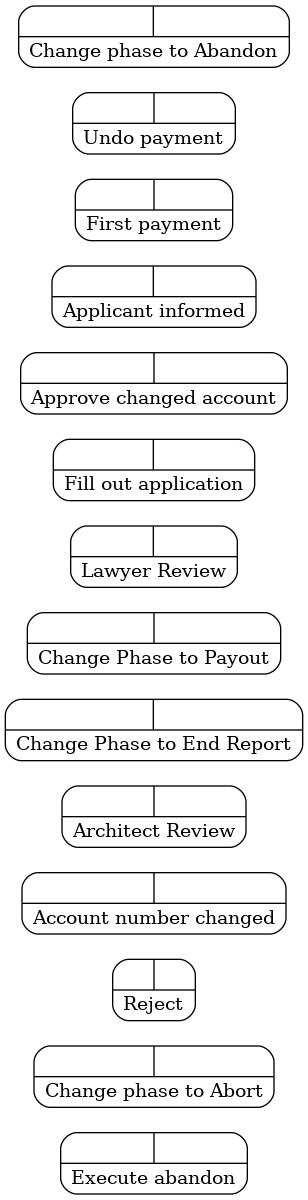

In [24]:
# Repeat this code block 9 times, once for each pattern

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Fill out application", "Architect Review", "Lawyer Review", "Reject", 
    "Applicant informed", "Change phase to Abort", "Change Phase to Payout", 
    "First payment", "Undo payment", "Change Phase to End Report", 
    "Account number changed", "Approve changed account", "Execute abandon", 
    "Change phase to Abandon"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

pm4py.view_dcr(graph)

## Task 2

Combine the separate patterns into a single model.

In [ ]:
# Add your code here


## Task 3

Answer the following questions:

**Which relations did you not use in your models?**

**Could some of the rules have been modelled in more than one way? If so, give one or two examples.**

**How does your model differ from the Petri net? Do they exhibit the same language?**

